In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import data_preprocess
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
male_matches = pd.read_csv("data/all_male_matches.csv")
female_matches = pd.read_csv("data/all_female_matches.csv")

male_df = data_preprocess.merge_dataset_total(male_matches, "male")
female_df = data_preprocess.merge_dataset_total(female_matches, "female")

## Neural Network

### Female

In [4]:
X, y = data_preprocess.get_features_target(female_df)
np_y = y.to_numpy()
np_y_one_hot = tf.one_hot(np_y, 2).numpy()

X_train, X_test, y_train, y_test = train_test_split(X, np_y_one_hot, test_size=0.15, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-05-18 10:20:23.393699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-18 10:20:23.394902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, validation_split=0.15)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

2023-05-18 10:20:27.578838: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-18 10:20:27.749680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
  230/10510 [..............................] - ETA: 1:27 - loss: 2828.4744 - accuracy: 0.5955

KeyboardInterrupt: 

In [6]:
# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'epochs' is not defined

### Male

In [7]:
X, y = data_preprocess.get_features_target(male_df)
np_y = y.to_numpy()
np_y_one_hot = tf.one_hot(np_y, 2).numpy()

X_train, X_test, y_train, y_test = train_test_split(X, np_y_one_hot, test_size=0.15, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, validation_split=0.15)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


Epoch 1/10
   13/13753 [..............................] - ETA: 2:02 - loss: 9237.7168 - accuracy: 0.3822 

2023-05-18 10:20:40.384663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  251/13753 [..............................] - ETA: 1:56 - loss: 2530.2566 - accuracy: 0.6021

KeyboardInterrupt: 

In [9]:
# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'epochs' is not defined

## Decesion tree

### Female

In [10]:
X, y = data_preprocess.get_features_target(female_df)

In [11]:
np_y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, np_y, test_size=0.15, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95587161087956


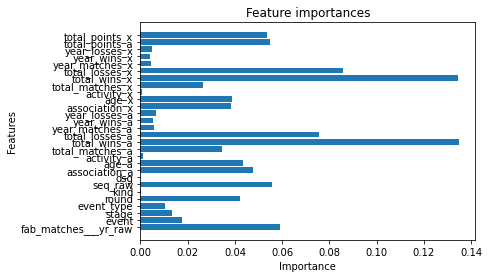

In [12]:
importances = clf.feature_importances_

plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.show()

### Male

In [13]:
X, y = data_preprocess.get_features_target(male_df)

In [14]:
np_y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, np_y, test_size=0.15, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9540638749644288


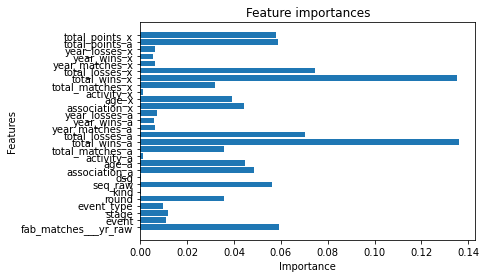

In [15]:
importances = clf.feature_importances_

plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.show()